### Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When 
these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the 
company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, 
some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. 

### Business Goal :

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying 
customers. 

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead 
score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profile

%matplotlib inline

In [3]:
# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# Importing dataset

leadInfo = pd.read_csv('Leads.csv', encoding = 'latin')
leadInfo.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
# inspect leadInfo dataframe

print("*********************************  Info *******************************************") 
print(leadInfo.info())
print("*********************************  Shape ******************************************") 
print(leadInfo.shape)
print("**************************** Columns having null values *****************************")
print(leadInfo.isnull().any())
print("**************************** Describe *****************************")
leadInfo.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                 

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
row1 = leadInfo.shape[0]
row1

9240

## Step 2: Data Cleaning

In [7]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are some columns that have more than 25% null values.

In [8]:
# Check if there are any duplicate values in the dataset

leadInfo[leadInfo.duplicated(keep=False)]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

There are no duplicate values in the data.

In [9]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

leadInfo['Specialization'] = leadInfo['Specialization'].replace('Select', np.nan)
leadInfo['How did you hear about X Education'] = leadInfo['How did you hear about X Education'].replace('Select', np.nan)
leadInfo['Lead Profile'] = leadInfo['Lead Profile'].replace('Select', np.nan)
leadInfo['City'] = leadInfo['City'].replace('Select', np.nan)

In [10]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Let us drop the following columns that have more than 30% null values

# a) Specialization
# b) How did you hear about X Education
# c) Tags
# d) Lead Quality
# e) Lead Profile
# f) City
# g) Asymmetrique Activity Index
# h) Asymmetrique Profile Index
# i) Asymmetrique Activity Score
# j) Asymmetrique Profile Score

leadInfo = leadInfo.drop(['Specialization','How did you hear about X Education', 'Lead Quality',
                          'Lead Profile','Tags','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [12]:
# check for percentage of null values in each column after dropping columns having more than 30% null values

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Following columns have null values :
    - Country
    - Lead Source
    - Total Visits
    - Page Views Per Visit
    - Last Activity    
    - What is your current occupation
    - What matters most to you in choosing a course
    
Let us see and decide whather we need to impute values in the above column or drop the columns.

In [13]:
# Lets check the value counts for each values in the country column

leadInfo.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Kuwait                     4
Canada                     4
Germany                    4
Sweden                     3
China                      2
Asia/Pacific Region        2
Italy                      2
Belgium                    2
Bangladesh                 2
Netherlands                2
Ghana                      2
Philippines                2
Uganda                     2
Tanzania                   1
Liberia                    1
Kenya                      1
Russia                     1
Vietnam                    1
Sri Lanka                  1
Malaysia      

In [14]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(leadInfo[leadInfo['Country'] == 'India'])/len(leadInfo['Country']),2)
print(country_percentage)

70.26


In [15]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

leadInfo = leadInfo.drop(['Country'], axis=1)
leadInfo.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [16]:
# Check the value counts for the column Lead Source

leadInfo['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
NC_EDM                  1
blog                    1
welearnblog_Home        1
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

In [17]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('google', 'Google')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace(np.nan, 'Google')

In [18]:
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release','Live Chat','Social Media','NC_EDM','Pay per Click Ads','youtubechannel','testone','WeLearn','welearnblog_Home','welearnblog_Home','blog'],'Other Source')
leadInfo['Lead Source'].value_counts()


Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other Source          78
Name: Lead Source, dtype: int64

In [19]:
# Check the value counts for the column Total Visits

leadInfo['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [20]:
# Check the median of column 

leadInfo['TotalVisits'].median()

3.0

In [21]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

leadInfo['TotalVisits'] = leadInfo['TotalVisits'].replace(np.nan, leadInfo['TotalVisits'].median())

In [22]:
# Check the value counts for Page Views Per Visit

leadInfo['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [23]:
# Check the median of the column

leadInfo['Page Views Per Visit'].median()

2.0

In [24]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

leadInfo['Page Views Per Visit'] = leadInfo['Page Views Per Visit'].replace(np.nan, leadInfo['Page Views Per Visit'].median())

In [25]:
# Check the value counts for the column Last Activity

leadInfo['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [26]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

leadInfo['Last Activity'] = leadInfo['Last Activity'].replace(np.nan, 'Not Sure')

In [27]:
# Check the value counts for the column "What is your current Occupation"

leadInfo['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that 
# as value for the null columns

leadInfo['What is your current occupation'] = leadInfo['What is your current occupation'].replace(np.nan, 'Other') 

In [29]:

leadInfo['What is your current occupation'] = leadInfo['What is your current occupation'].replace(['Housewife','Businessman'], 'Other')
leadInfo['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2724
Working Professional     706
Student                  210
Name: What is your current occupation, dtype: int64

In [30]:
# Check the value counts for the column What matters most to you in choosing a course 

leadInfo['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
matters_most_percentage = round(100*len(leadInfo[leadInfo['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(leadInfo['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [32]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

leadInfo = leadInfo.drop(['What matters most to you in choosing a course'], axis=1)

In [33]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data 
concentrated towards one value

In [34]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

leadInfo = leadInfo.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [35]:
leadInfo.shape

(9240, 20)

##### Outlier Treatment

In [36]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9240.000000                  9240.000000   
mean   617188.435606     0.385390     3.438636                   487.698268   
std     23405.995698     0.486714     4.819024                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
90%    650506.100000     1.000000     7.000000                  1380.000000   
95%    655404.050000     1.000000    10.000000                  1562.000000   
99%    659592.980000     1.000000    17.000000                  1840.610000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

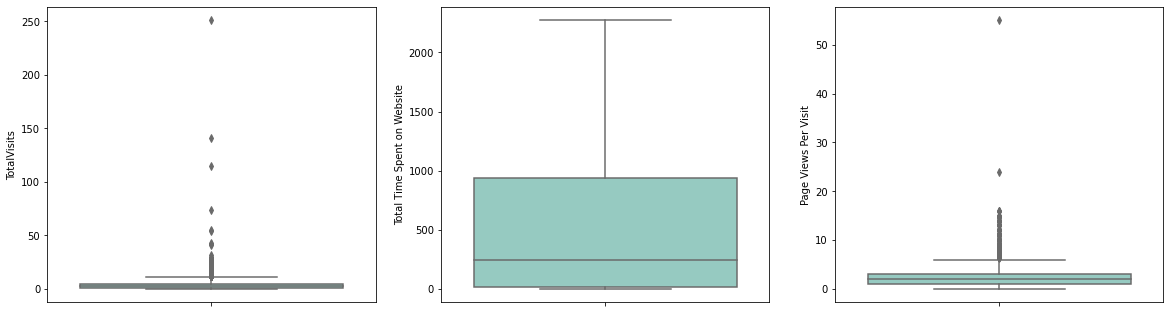

In [37]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leadInfo)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leadInfo)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leadInfo)
plt.show()

In [38]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = leadInfo['TotalVisits'].quantile(0.99)
leadInfo = leadInfo[leadInfo["TotalVisits"] < nn_quartile_total_visits]
leadInfo["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [39]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9141.00000  9141.000000  9141.000000                  9141.000000   
mean   617233.45192     0.385406     3.179740                   486.074609   
std     23413.72193     0.486718     2.913631                   547.856302   
min    579533.00000     0.000000     0.000000                     0.000000   
25%    596519.00000     0.000000     1.000000                    10.000000   
50%    615563.00000     0.000000     3.000000                   247.000000   
75%    637414.00000     1.000000     5.000000                   933.000000   
90%    650514.00000     1.000000     7.000000                  1379.000000   
95%    655406.00000     1.000000     9.000000                  1561.000000   
99%    659592.80000     1.000000    13.000000                  1839.600000   
max    660737.00000     1.000000    16.000000                  2272.000000   

       Page Views Per Visit  
count           9141.000000  
mean               2.329506  
std                2.046673  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               16.000000

In [40]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = leadInfo['Page Views Per Visit'].quantile(0.99)
leadInfo = leadInfo[leadInfo["Page Views Per Visit"] < nn_quartile_page_visits]
leadInfo["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [41]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9029.000000  9029.000000  9029.000000                  9029.000000   
mean   617223.248422     0.385092     3.087164                   483.133016   
std     23372.383121     0.486644     2.801244                   547.420675   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596530.000000     0.000000     1.000000                     7.000000   
50%    615645.000000     0.000000     3.000000                   245.000000   
75%    637360.000000     1.000000     4.000000                   929.000000   
90%    650463.200000     1.000000     7.000000                  1378.000000   
95%    655351.600000     1.000000     8.000000                  1558.000000   
99%    659577.800000     1.000000    13.000000                  1839.720000   
max    660737.000000     1.000000    16.000000                  2272.000000   

       Page Views Per Visit  
count           9029.000000  
mean               2.226383  
std                1.823395  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                7.000000  
max                8.000000

In [42]:
# Determine the percentage of data retained

num_data = round(100*(len(leadInfo)/9240),2)
print(num_data)

97.72


At this point, the data has been cleaned and around 98% of data has been retained

In [43]:
row2 = leadInfo.shape[0]
row2

9029

In [44]:
(row2/row1)*100

97.71645021645021

### Step 3: Data Analysis
Let us try and understand the data now based on each columns effect on the conversion rates

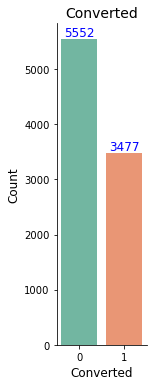

In [45]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=leadInfo, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

- From the above graph, there has been a overall conversion rate of around 39%

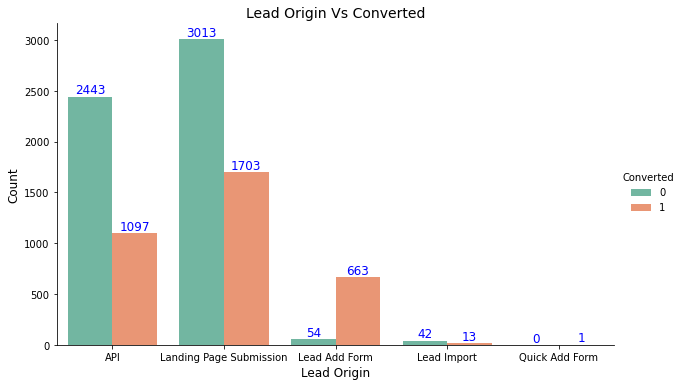

In [46]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

- From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission
Also there was only one request from quick add form which got converted.

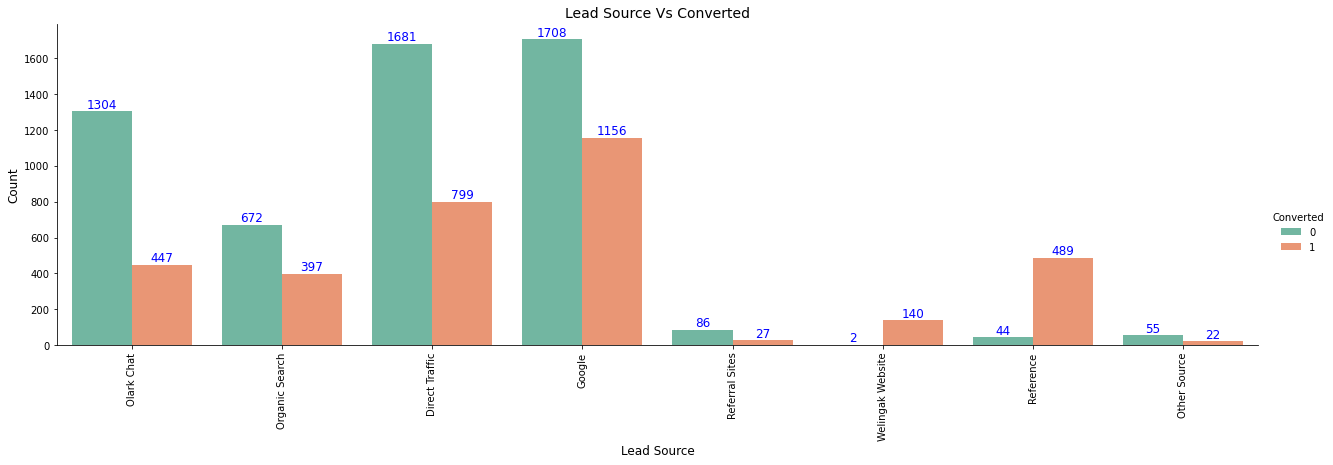

In [47]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

From the above graph, it can be seen that major conversion in the lead source is from google

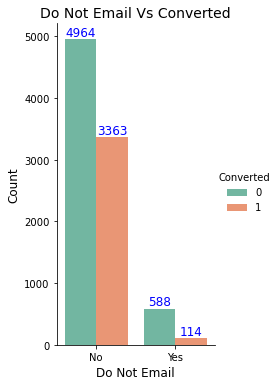

In [48]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Based on the above graph, major conversion has happend from the emails that have been sent

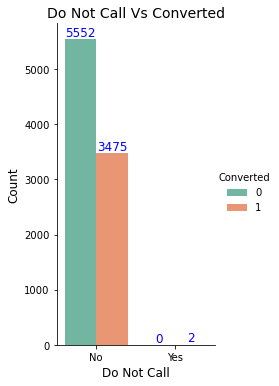

In [49]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made.
However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

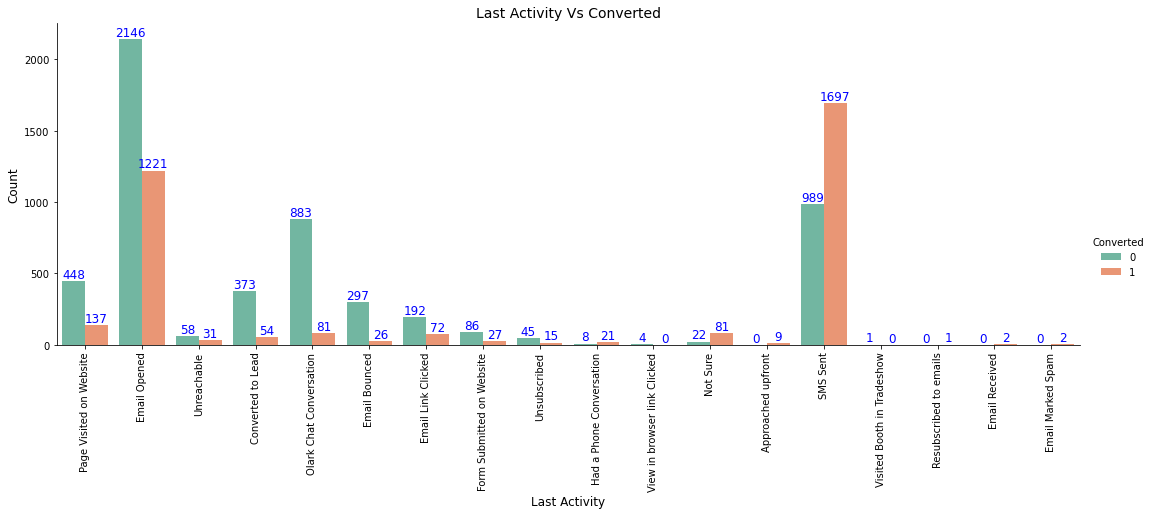

In [50]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion

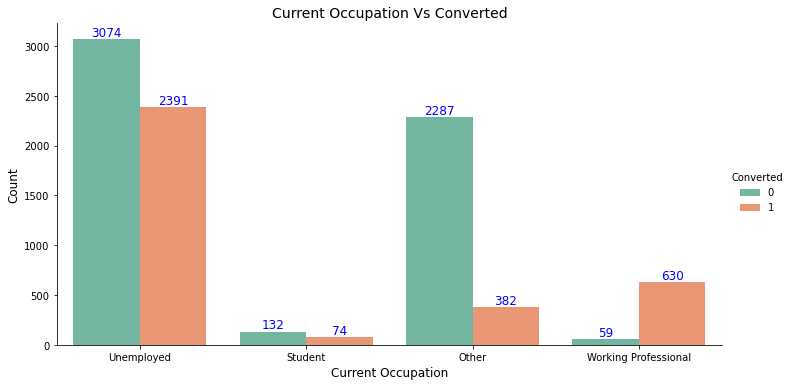

In [51]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leadInfo, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that 
    - Out of 7 business men, 4 got converted
    - Out 10 housewives, all 10 leads got converted.

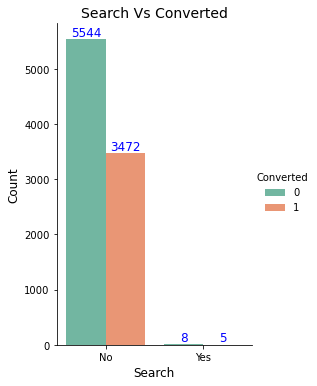

In [52]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

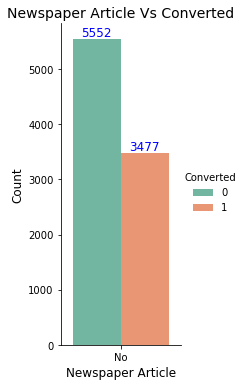

In [53]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [54]:
# Dropping Newspaper Article

leadInfo = leadInfo.drop(['Newspaper Article'], axis=1)

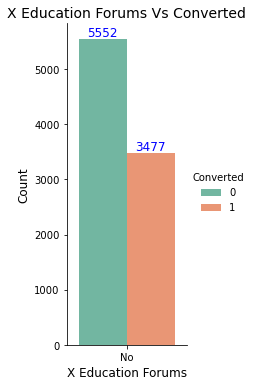

In [55]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [56]:
# Dropping X Education Forum column

leadInfo = leadInfo.drop(['X Education Forums'], axis=1)

In [57]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [58]:
# Dropping Newspaper column

leadInfo = leadInfo.drop(['Newspaper'], axis=1)

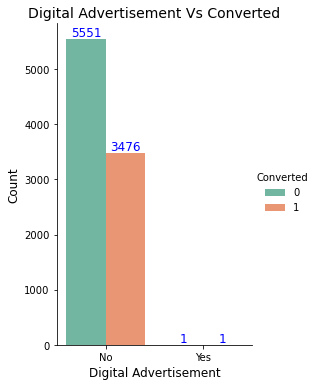

In [59]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

In [60]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

In [61]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leadInfo, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

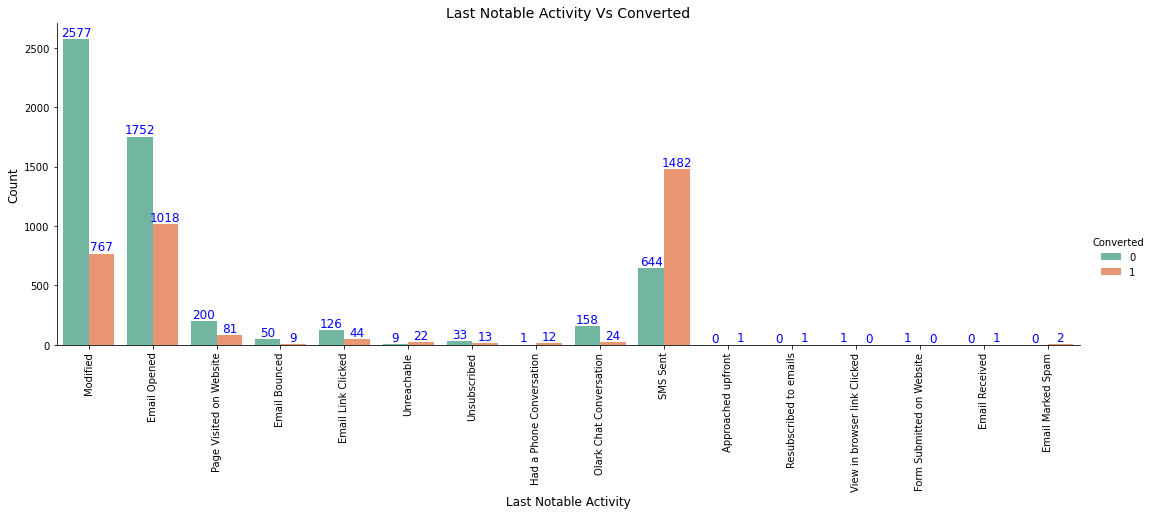

In [62]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

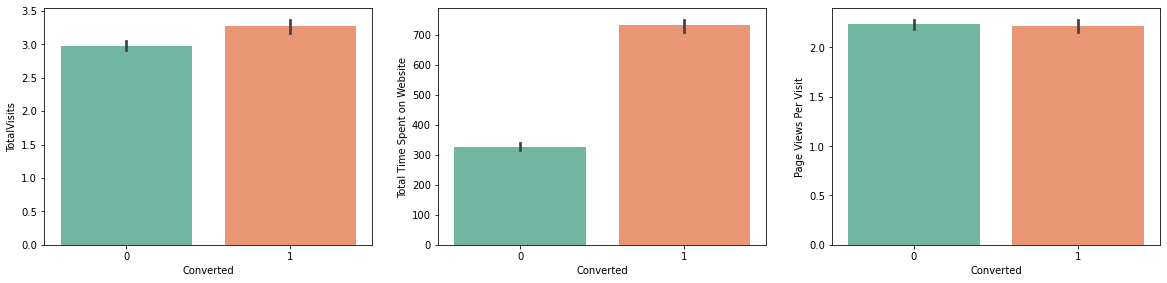

In [63]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leadInfo)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

## Step 4: Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [64]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leadInfo[variablelist] = leadInfo[variablelist].apply(binary_map)

In [65]:
leadInfo = leadInfo.drop(['Last Activity','Last Notable Activity'],1)
leadInfo.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

  What is your current occupation  Search  Digital Advertisement  \
0                      Unemployed       0                      0   
1                      Unemployed       0                      0   
2                         Student       0                      0   
3                      Unemployed       0                      0   
4                      Unemployed       0                      0   

   Through Recommendations  A free copy of Mastering The Interview  
0                        0                                       0  
1                        0                                       0  
2                        0                                       1  
3                        0                                       0  
4                        0                                       0

In [66]:
# Creating dummies for the following columns below

dummy_ = pd.get_dummies(leadInfo[['Lead Origin', 'Lead Source','What is your current occupation']], drop_first=True)
leadInfo = pd.concat([leadInfo, dummy_], axis=1)
leadInfo.head()


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

  What is your current occupation  Search  Digital Advertisement  \
0                      Unemployed       0                      0   
1                      Unemployed       0                      0   
2                         Student       0                      0   
3                      Unemployed       0                      0   
4                      Unemployed       0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other Source  Lead Source_Reference  \
0                         0                      0   
1                         0                      0   
2                         0                      0   
3                         0                      0   
4                         0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   What is

In [67]:
# Remove following columns from the leadInfo

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

leadInfo = leadInfo.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
                          'What is your current occupation'], axis=1)


In [68]:
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9029 non-null   int64  
 1   Do Not Call                                           9029 non-null   int64  
 2   Converted                                             9029 non-null   int64  
 3   TotalVisits                                           9029 non-null   float64
 4   Total Time Spent on Website                           9029 non-null   int64  
 5   Page Views Per Visit                                  9029 non-null   float64
 6   Search                                                9029 non-null   int64  
 7   Digital Advertisement                                 9029 non-null   int64  
 8   Through Recommendations                               9029

In [69]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Do Not Email                                            0.0
Do Not Call                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
Search                                                  0.0
Digital Advertisement                                   0.0
Through Recommendations                                 0.0
A free copy of Mastering The Interview                  0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
Lead Origin_Quick Add Form                              0.0
Lead Source_Google                                      0.0
Lead Source_Olark Chat                                  0.0
Lead Source_Organic Search              

In [70]:
# check shape of the data frame

leadInfo.shape

(9029, 24)

Since there are around 24 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

### Step 5: Test-Train Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# Putting feature variable to X

X = leadInfo.drop(['Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Digital Advertisement  \
0                   0.0       0                      0   
1                   2.5       0                      0   
2                   2.0       0                      0   
3                   1.0       0                      0   
4                   1.0       0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other Source  Lead Source_Reference  \
0                         0                      0   
1                         0                      0   
2                         0                      0   
3                         0                      0   
4                         0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Working Professional  
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0 

In [73]:
# Putting response variable to y

y = leadInfo['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Step 6: Rescaling the features with MinMax Scaling

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
2240             0            0       0.1875                     0.898963   
113              0            0       0.3125                     0.706360   
4132             0            0       0.3750                     0.768155   
5573             0            0       0.1250                     0.028868   
1109             0            0       0.0625                     0.009021   

      Page Views Per Visit  Search  Digital Advertisement  \
2240                 0.375       0                      0   
113                  0.625       0                      0   
4132                 0.750       0                      0   
5573                 0.250       0                      0   
1109                 0.125       0                      0   

      Through Recommendations  A free copy of Mastering The Interview  \
2240                        0                                       0   
113                         0                                       0   
4132                        0                                       1   
5573                        0                                       1   
1109                        0                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
2240                                    1                          0   
113                                     0                          0   
4132                                    1                          0   
5573                                    1                          0   
1109                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
2240                        0                           0                   1   
113                         0                           0                   0   
4132                        0                           0                   0   
5573                        0                           0                   0   
1109                        0                           0                   1   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
2240                       0                           0   
113                        0                           0   
4132                       0                           0   
5573                       0                           0   
1109                       0                           0   

      Lead Source_Other Source  Lead Source_Reference  \
2240                         0                      0   
113                          0                      0   
4132                         0                      0   
5573                         0                      0   
1109                         0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
2240                           0                             0   
113                            0                             0   
4132                           0                             0   
5573                           0                             0   
1109                           0                             0   

      What is your current occupation_Student  \
2240                                        0   
113                                         0   
4132                                        0   
5573                                        0   
1109                                        0   

      What is your current occupation_Unemployed  \
2240                                           0   
113                                            1   
4132                                           1   
5573                                           1   
1109                                           0   

      What is your current occupation_Working Professional  
2240                                           

In [76]:
### Checking the Conversion Rate percentage

converted = (sum(leadInfo['Converted'])/len(leadInfo['Converted'].index))*100
converted

38.50924797873519

#### We have almost 39% conversion rate

### Step 7: Model Building
Assessing the model with StatsModels

#### Running the Initial Training Model

In [77]:
import statsmodels.api as sm

In [78]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.2
Date:                Tue, 11 Jan 2022   Deviance:                       5620.3
Time:                        12:35:28   Pearson chi2:                 6.85e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4499      0.156    -22.078      0.000      -3.756      -3.144
Do Not Email                                            -1.2403      0.162     -7.647      0.000      -1.558      -0.922
Do Not Call                                             19.6499   2.05e+04      0.001      0.999   -4.02e+04    4.03e+04
TotalVisits                                              1.4107      0.275      5.124      0.000       0.871       1.950
Total Time Spent on Website                              4.4810      0.161     27.908      0.000       4.166       4.796
Page Views Per Visit                                    -0.2783      0.245     -1.137      0.256      -0.758       0.202
Search                                                  -1.7792      1.066     -1.669      0.095      -3.868       0.310
Digital Advertisement                                    0.3012      1.794      0.168      0.867      -3.215       3.817
Through Recommendations                                  1.2520      2.315      0.541      0.589      -3.285       5.789
A free copy of Mastering The Interview                  -0.0992      0.104     -0.952      0.341      -0.304       0.105
Lead Origin_Landing Page Submission                      0.0377      0.103      0.367      0.714      -0.164       0.239
Lead Origin_Lead Add Form                                3.4712      0.502      6.915      0.000       2.487       4.455
Lead Origin_Lead Import                                  0.3466      0.908      0.382      0.703      -1.433       2.126
Lead Origin_Quick Add Form                              19.9149   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Google                                       0.3441      0.111      3.101      0.002       0.127       0.562
Lead Source_Olark Chat                                   1.4098      0.155      9.091      0.000       1.106       1.714
Lead Source_Organic Search                               0.2502      0.126      1.978      0.048       0.002       0.498
Lead Source_Other Source                                -0.3065      0.814     -0.376      0.707      -1.902       1.289
Lead Source_Reference                                    0.5624      0.538      1.046      0.295      -0.491       1.616
Lead Source_Referral Sites                              -0.2807      0.338     -0.829      0.407      -0.944       0.383
Lead Source_Welingak Website                             2.7491      0.873      3.149      0.002       1.038       4.460
What is your current occupation_Student                  1.0015      0.218      4.601      0.000       0.575       1.428
What is your current occupation_Unemployed               1

### Step 8: Feature Selection Using RFE

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [80]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other Source', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [83]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### Rebuilding Model - Model 2

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.3
Date:                Tue, 11 Jan 2022   Deviance:                       5620.6
Time:                        12:35:28   Pearson chi2:                 6.86e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4291      0.147    -23.256      0.000      -3.718      -3.140
Do Not Email                                            -1.2367      0.162     -7.636      0.000      -1.554      -0.919
Do Not Call                                             19.6364   2.05e+04      0.001      0.999   -4.02e+04    4.02e+04
TotalVisits                                              1.4089      0.275      5.119      0.000       0.869       1.948
Total Time Spent on Website                              4.4801      0.161     27.909      0.000       4.166       4.795
Page Views Per Visit                                    -0.2593      0.238     -1.091      0.275      -0.725       0.206
Search                                                  -1.7792      1.066     -1.668      0.095      -3.869       0.311
Through Recommendations                                  1.2506      2.316      0.540      0.589      -3.290       5.791
A free copy of Mastering The Interview                  -0.0885      0.099     -0.894      0.371      -0.282       0.105
Lead Origin_Lead Add Form                                3.4219      0.490      6.988      0.000       2.462       4.382
Lead Origin_Quick Add Form                              19.8915   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Google                                       0.3380      0.110      3.078      0.002       0.123       0.553
Lead Source_Olark Chat                                   1.3874      0.145      9.580      0.000       1.104       1.671
Lead Source_Organic Search                               0.2363      0.121      1.953      0.051      -0.001       0.473
Lead Source_Other Source                                -0.0622      0.420     -0.148      0.882      -0.885       0.760
Lead Source_Reference                                    0.5887      0.528      1.114      0.265      -0.447       1.624
Lead Source_Referral Sites                              -0.3045      0.333     -0.916      0.360      -0.956       0.347
Lead Source_Welingak Website                             2.7750      0.867      3.199      0.001       1.075       4.475
What is your current occupation_Student                  1.0015      0.218      4.604      0.000       0.575       1.428
What is your current occupation_Unemployed               1.3229      0.083     15.907      0.000       1.160       1.486
What is your current occupation_Working Professional     3.9649      0.204     19.424      0.000       3.565       4.365
========================================================================================================================
"""

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8                           Lead Origin_Lead Add Form  17.58
14                              Lead Source_Reference  13.81
4                                Page Views Per Visit   6.13
2                                         TotalVisits   4.93
16                       Lead Source_Welingak Website   4.79
18         What is your current occupation_Unemployed   2.88
10                                 Lead Source_Google   2.47
3                         Total Time Spent on Website   2.21
7              A free copy of Mastering The Interview   2.10
12                         Lead Source_Organic Search   1.53
19  What is your current occupation_Working Profes...   1.34
11                             Lead Source_Olark Chat   1.21
5                                              Search   1.19
6                             Through Recommendations   1.18
0                                        Do Not Email   1.08
15                         Lead Source_Referral Sites   1.06
17            What is your current occupation_Student   1.06
13                           Lead Source_Other Source   1.03
1                                         Do Not Call   1.00
9                          Lead Origin_Quick Add Form   1.00

- Removing column 'Do Not Call' as it has a high pvalue and hence is insignificant

In [86]:
col = col.drop('Do Not Call',1)

#### Rebuilding Model - Model 3

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.6
Date:                Tue, 11 Jan 2022   Deviance:                       5621.2
Time:                        12:35:28   Pearson chi2:                 6.86e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4298      0.147    -23.260      0.000      -3.719      -3.141
Do Not Email                                            -1.2371      0.162     -7.637      0.000      -1.555      -0.920
TotalVisits                                              1.4118      0.275      5.131      0.000       0.873       1.951
Total Time Spent on Website                              4.4813      0.161     27.917      0.000       4.167       4.796
Page Views Per Visit                                    -0.2606      0.238     -1.097      0.273      -0.726       0.205
Search                                                  -1.7801      1.067     -1.669      0.095      -3.871       0.310
Through Recommendations                                  1.2507      2.317      0.540      0.589      -3.290       5.792
A free copy of Mastering The Interview                  -0.0888      0.099     -0.897      0.370      -0.283       0.105
Lead Origin_Lead Add Form                                3.4221      0.490      6.989      0.000       2.462       4.382
Lead Origin_Quick Add Form                              18.8907   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                                       0.3382      0.110      3.080      0.002       0.123       0.553
Lead Source_Olark Chat                                   1.3878      0.145      9.582      0.000       1.104       1.672
Lead Source_Organic Search                               0.2361      0.121      1.951      0.051      -0.001       0.473
Lead Source_Other Source                                -0.0621      0.420     -0.148      0.882      -0.885       0.761
Lead Source_Reference                                    0.5938      0.528      1.124      0.261      -0.442       1.629
Lead Source_Referral Sites                              -0.3048      0.333     -0.917      0.359      -0.957       0.347
Lead Source_Welingak Website                             2.7752      0.867      3.199      0.001       1.075       4.475
What is your current occupation_Student                  1.0014      0.218      4.602      0.000       0.575       1.428
What is your current occupation_Unemployed               1.3232      0.083     15.910      0.000       1.160       1.486
What is your current occupation_Working Professional     3.9650      0.204     19.423      0.000       3.565       4.365
========================================================================================================================
"""

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7                           Lead Origin_Lead Add Form  17.58
13                              Lead Source_Reference  13.81
3                                Page Views Per Visit   6.13
1                                         TotalVisits   4.93
15                       Lead Source_Welingak Website   4.79
17         What is your current occupation_Unemployed   2.88
9                                  Lead Source_Google   2.47
2                         Total Time Spent on Website   2.21
6              A free copy of Mastering The Interview   2.10
11                         Lead Source_Organic Search   1.53
18  What is your current occupation_Working Profes...   1.34
10                             Lead Source_Olark Chat   1.21
4                                              Search   1.19
5                             Through Recommendations   1.18
0                                        Do Not Email   1.08
14                         Lead Source_Referral Sites   1.06
16            What is your current occupation_Student   1.06
12                           Lead Source_Other Source   1.03
8                          Lead Origin_Quick Add Form   1.00

- Removing column 'Lead Origin_Quick Add Form' as it has a high pvalue and hence is insignificant

In [89]:
col = col.drop('Lead Origin_Quick Add Form',1)

#### Rebuilding Model - Model 4

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.8
Date:                Tue, 11 Jan 2022   Deviance:                       5621.5
Time:                        12:35:29   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4308      0.147    -23.268      0.000      -3.720      -3.142
Do Not Email                                            -1.2332      0.162     -7.631      0.000      -1.550      -0.916
TotalVisits                                              1.4118      0.275      5.130      0.000       0.872       1.951
Total Time Spent on Website                              4.4839      0.160     27.949      0.000       4.169       4.798
Page Views Per Visit                                    -0.2614      0.238     -1.100      0.271      -0.727       0.204
Search                                                  -1.7801      1.067     -1.669      0.095      -3.871       0.310
Through Recommendations                                  1.2512      2.317      0.540      0.589      -3.290       5.793
A free copy of Mastering The Interview                  -0.0889      0.099     -0.898      0.369      -0.283       0.105
Lead Origin_Lead Add Form                                3.4207      0.490      6.987      0.000       2.461       4.380
Lead Source_Google                                       0.3388      0.110      3.085      0.002       0.124       0.554
Lead Source_Olark Chat                                   1.3885      0.145      9.587      0.000       1.105       1.672
Lead Source_Organic Search                               0.2363      0.121      1.952      0.051      -0.001       0.473
Lead Source_Other Source                                -0.0614      0.420     -0.146      0.884      -0.884       0.761
Lead Source_Reference                                    0.5956      0.528      1.127      0.260      -0.440       1.631
Lead Source_Referral Sites                              -0.3047      0.333     -0.916      0.360      -0.957       0.347
Lead Source_Welingak Website                             2.7763      0.867      3.201      0.001       1.076       4.476
What is your current occupation_Student                  1.0016      0.218      4.603      0.000       0.575       1.428
What is your current occupation_Unemployed               1.3236      0.083     15.914      0.000       1.161       1.487
What is your current occupation_Working Professional     3.9653      0.204     19.424      0.000       3.565       4.365
========================================================================================================================
"""

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7                           Lead Origin_Lead Add Form  17.58
12                              Lead Source_Reference  13.81
3                                Page Views Per Visit   6.13
1                                         TotalVisits   4.93
14                       Lead Source_Welingak Website   4.79
16         What is your current occupation_Unemployed   2.88
8                                  Lead Source_Google   2.47
2                         Total Time Spent on Website   2.21
6              A free copy of Mastering The Interview   2.09
10                         Lead Source_Organic Search   1.53
17  What is your current occupation_Working Profes...   1.34
9                              Lead Source_Olark Chat   1.21
4                                              Search   1.19
5                             Through Recommendations   1.18
0                                        Do Not Email   1.08
13                         Lead Source_Referral Sites   1.06
15            What is your current occupation_Student   1.06
11                           Lead Source_Other Source   1.03

- Removing column 'Lead Source_Other Source' as it has high pvalue and hence is insignificant

In [92]:
col = col.drop('Lead Source_Other Source',1)

#### Rebuilding Model - Model 5

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.8
Date:                Tue, 11 Jan 2022   Deviance:                       5621.5
Time:                        12:35:29   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4352      0.144    -23.781      0.000      -3.718      -3.152
Do Not Email                                            -1.2323      0.161     -7.631      0.000      -1.549      -0.916
TotalVisits                                              1.4122      0.275      5.132      0.000       0.873       1.952
Total Time Spent on Website                              4.4853      0.160     28.003      0.000       4.171       4.799
Page Views Per Visit                                    -0.2600      0.237     -1.095      0.273      -0.725       0.205
Search                                                  -1.7799      1.067     -1.668      0.095      -3.871       0.311
Through Recommendations                                  1.2520      2.318      0.540      0.589      -3.291       5.794
A free copy of Mastering The Interview                  -0.0865      0.098     -0.886      0.376      -0.278       0.105
Lead Origin_Lead Add Form                                3.4147      0.488      6.999      0.000       2.459       4.371
Lead Source_Google                                       0.3419      0.108      3.174      0.002       0.131       0.553
Lead Source_Olark Chat                                   1.3927      0.142      9.808      0.000       1.114       1.671
Lead Source_Organic Search                               0.2383      0.120      1.982      0.047       0.003       0.474
Lead Source_Reference                                    0.6057      0.524      1.157      0.247      -0.421       1.632
Lead Source_Referral Sites                              -0.3019      0.332     -0.909      0.363      -0.953       0.349
Lead Source_Welingak Website                             2.7864      0.865      3.222      0.001       1.092       4.481
What is your current occupation_Student                  1.0018      0.218      4.604      0.000       0.575       1.428
What is your current occupation_Unemployed               1.3236      0.083     15.914      0.000       1.161       1.487
What is your current occupation_Working Professional     3.9655      0.204     19.426      0.000       3.565       4.366
========================================================================================================================
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7                           Lead Origin_Lead Add Form  17.42
11                              Lead Source_Reference  13.65
3                                Page Views Per Visit   6.13
1                                         TotalVisits   4.92
13                       Lead Source_Welingak Website   4.74
15         What is your current occupation_Unemployed   2.84
8                                  Lead Source_Google   2.44
2                         Total Time Spent on Website   2.21
6              A free copy of Mastering The Interview   2.08
10                         Lead Source_Organic Search   1.53
16  What is your current occupation_Working Profes...   1.34
9                              Lead Source_Olark Chat   1.21
4                                              Search   1.19
5                             Through Recommendations   1.18
0                                        Do Not Email   1.08
12                         Lead Source_Referral Sites   1.06
14            What is your current occupation_Student   1.06

Removing column 'Through Recommendations' as it has high pvalue and hence is insignificant 

In [95]:
col = col.drop('Through Recommendations',1)

#### Rebuilding Model - Model 6

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.9
Date:                Tue, 11 Jan 2022   Deviance:                       5621.9
Time:                        12:35:29   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4348      0.144    -23.781      0.000      -3.718      -3.152
Do Not Email                                            -1.2325      0.162     -7.631      0.000      -1.549      -0.916
TotalVisits                                              1.4145      0.275      5.141      0.000       0.875       1.954
Total Time Spent on Website                              4.4847      0.160     28.007      0.000       4.171       4.799
Page Views Per Visit                                    -0.2626      0.237     -1.106      0.269      -0.728       0.203
Search                                                  -1.6298      1.013     -1.609      0.108      -3.615       0.355
A free copy of Mastering The Interview                  -0.0857      0.098     -0.878      0.380      -0.277       0.106
Lead Origin_Lead Add Form                                3.4144      0.488      6.998      0.000       2.458       4.371
Lead Source_Google                                       0.3418      0.108      3.173      0.002       0.131       0.553
Lead Source_Olark Chat                                   1.3924      0.142      9.808      0.000       1.114       1.671
Lead Source_Organic Search                               0.2374      0.120      1.975      0.048       0.002       0.473
Lead Source_Reference                                    0.6054      0.524      1.156      0.248      -0.421       1.632
Lead Source_Referral Sites                              -0.3021      0.332     -0.910      0.363      -0.953       0.349
Lead Source_Welingak Website                             2.7862      0.865      3.222      0.001       1.092       4.481
What is your current occupation_Student                  1.0017      0.218      4.604      0.000       0.575       1.428
What is your current occupation_Unemployed               1.3236      0.083     15.915      0.000       1.161       1.487
What is your current occupation_Working Professional     3.9703      0.204     19.454      0.000       3.570       4.370
========================================================================================================================
"""

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6                           Lead Origin_Lead Add Form  17.42
10                              Lead Source_Reference  13.65
3                                Page Views Per Visit   6.12
1                                         TotalVisits   4.92
12                       Lead Source_Welingak Website   4.74
14         What is your current occupation_Unemployed   2.84
7                                  Lead Source_Google   2.44
2                         Total Time Spent on Website   2.21
5              A free copy of Mastering The Interview   2.08
9                          Lead Source_Organic Search   1.53
15  What is your current occupation_Working Profes...   1.34
8                              Lead Source_Olark Chat   1.21
0                                        Do Not Email   1.08
11                         Lead Source_Referral Sites   1.06
13            What is your current occupation_Student   1.06
4                                              Search   1.01

- Removing column 'Lead Origin_Lead Add Form' as it has high vif and hence insignificant

In [98]:
col = col.drop('Lead Origin_Lead Add Form',1)

#### Rebuilding Model - Model 7

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2842.8
Date:                Tue, 11 Jan 2022   Deviance:                       5685.5
Time:                        12:35:29   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3136      0.142    -23.372      0.000      -3.591      -3.036
Do Not Email                                            -1.1323      0.158     -7.180      0.000      -1.441      -0.823
TotalVisits                                              1.3230      0.272      4.858      0.000       0.789       1.857
Total Time Spent on Website                              4.3629      0.158     27.642      0.000       4.054       4.672
Page Views Per Visit                                    -0.4649      0.236     -1.973      0.048      -0.927      -0.003
Search                                                  -1.5170      0.994     -1.526      0.127      -3.465       0.431
A free copy of Mastering The Interview                  -0.0926      0.097     -0.956      0.339      -0.282       0.097
Lead Source_Google                                       0.3865      0.107      3.622      0.000       0.177       0.596
Lead Source_Olark Chat                                   1.2664      0.139      9.081      0.000       0.993       1.540
Lead Source_Organic Search                               0.2536      0.119      2.125      0.034       0.020       0.488
Lead Source_Reference                                    3.8776      0.228     16.984      0.000       3.430       4.325
Lead Source_Referral Sites                              -0.2907      0.329     -0.883      0.377      -0.936       0.355
Lead Source_Welingak Website                             6.0341      0.727      8.300      0.000       4.609       7.459
What is your current occupation_Student                  1.0037      0.216      4.643      0.000       0.580       1.427
What is your current occupation_Unemployed               1.3469      0.083     16.293      0.000       1.185       1.509
What is your current occupation_Working Professional     3.9661      0.203     19.510      0.000       3.568       4.365
========================================================================================================================
"""

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                Page Views Per Visit  6.09
1                                         TotalVisits  4.92
13         What is your current occupation_Unemployed  2.81
6                                  Lead Source_Google  2.41
2                         Total Time Spent on Website  2.21
5              A free copy of Mastering The Interview  2.08
8                          Lead Source_Organic Search  1.53
14  What is your current occupation_Working Profes...  1.34
9                               Lead Source_Reference  1.28
7                              Lead Source_Olark Chat  1.20
11                       Lead Source_Welingak Website  1.08
0                                        Do Not Email  1.07
10                         Lead Source_Referral Sites  1.06
12            What is your current occupation_Student  1.06
4                                              Search  1.01

- Removing column 'Lead Source_Referral Sites' as it has high vif and hence insignificant

In [101]:
col = col.drop('Lead Source_Referral Sites',1)

#### Rebuilding Model - Model 8

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.2
Date:                Tue, 11 Jan 2022   Deviance:                       5686.3
Time:                        12:35:30   Pearson chi2:                 6.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3327      0.140    -23.769      0.000      -3.608      -3.058
Do Not Email                                            -1.1301      0.158     -7.167      0.000      -1.439      -0.821
TotalVisits                                              1.3086      0.272      4.815      0.000       0.776       1.841
Total Time Spent on Website                              4.3632      0.158     27.641      0.000       4.054       4.673
Page Views Per Visit                                    -0.4704      0.235     -1.998      0.046      -0.932      -0.009
Search                                                  -1.5033      0.994     -1.513      0.130      -3.451       0.444
A free copy of Mastering The Interview                  -0.0764      0.095     -0.803      0.422      -0.263       0.110
Lead Source_Google                                       0.4090      0.104      3.942      0.000       0.206       0.612
Lead Source_Olark Chat                                   1.2845      0.138      9.306      0.000       1.014       1.555
Lead Source_Organic Search                               0.2716      0.118      2.307      0.021       0.041       0.502
Lead Source_Reference                                    3.8955      0.227     17.127      0.000       3.450       4.341
Lead Source_Welingak Website                             6.0519      0.727      8.327      0.000       4.628       7.476
What is your current occupation_Student                  1.0085      0.216      4.666      0.000       0.585       1.432
What is your current occupation_Unemployed               1.3477      0.083     16.306      0.000       1.186       1.510
What is your current occupation_Working Professional     3.9690      0.203     19.521      0.000       3.571       4.368
========================================================================================================================
"""

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                Page Views Per Visit  6.04
1                                         TotalVisits  4.89
12         What is your current occupation_Unemployed  2.81
6                                  Lead Source_Google  2.34
2                         Total Time Spent on Website  2.20
5              A free copy of Mastering The Interview  2.05
8                          Lead Source_Organic Search  1.50
13  What is your current occupation_Working Profes...  1.34
9                               Lead Source_Reference  1.28
7                              Lead Source_Olark Chat  1.20
10                       Lead Source_Welingak Website  1.08
0                                        Do Not Email  1.07
11            What is your current occupation_Student  1.06
4                                              Search  1.01

- Removing column 'A free copy of Mastering The Interview' as it has high vif and hence insignificant

In [104]:
col = col.drop('A free copy of Mastering The Interview',1)

#### Rebuilding Model - Model 9

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.5
Date:                Tue, 11 Jan 2022   Deviance:                       5687.0
Time:                        12:35:30   Pearson chi2:                 6.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3775      0.129    -26.196      0.000      -3.630      -3.125
Do Not Email                                            -1.1287      0.158     -7.162      0.000      -1.438      -0.820
TotalVisits                                              1.2898      0.271      4.764      0.000       0.759       1.820
Total Time Spent on Website                              4.3580      0.158     27.642      0.000       4.049       4.667
Page Views Per Visit                                    -0.4807      0.235     -2.045      0.041      -0.941      -0.020
Search                                                  -1.4781      0.994     -1.488      0.137      -3.426       0.469
Lead Source_Google                                       0.4583      0.084      5.474      0.000       0.294       0.622
Lead Source_Olark Chat                                   1.3282      0.127     10.453      0.000       1.079       1.577
Lead Source_Organic Search                               0.2948      0.114      2.583      0.010       0.071       0.518
Lead Source_Reference                                    3.9407      0.220     17.877      0.000       3.509       4.373
Lead Source_Welingak Website                             6.0979      0.725      8.417      0.000       4.678       7.518
What is your current occupation_Student                  1.0088      0.216      4.670      0.000       0.585       1.432
What is your current occupation_Unemployed               1.3463      0.083     16.294      0.000       1.184       1.508
What is your current occupation_Working Professional     3.9687      0.203     19.512      0.000       3.570       4.367
========================================================================================================================
"""

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                                Page Views Per Visit  5.66
1                                         TotalVisits  4.79
11         What is your current occupation_Unemployed  2.65
2                         Total Time Spent on Website  2.16
5                                  Lead Source_Google  1.84
7                          Lead Source_Organic Search  1.47
12  What is your current occupation_Working Profes...  1.32
8                               Lead Source_Reference  1.25
6                              Lead Source_Olark Chat  1.19
0                                        Do Not Email  1.07
9                        Lead Source_Welingak Website  1.07
10            What is your current occupation_Student  1.06
4                                              Search  1.01

- Removing column 'Page Views Per Visit' as it has high vif and hence insignificant

In [107]:
col = col.drop('Page Views Per Visit',1)

#### Rebuilding Model - Model 10 (Final Model)

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.6
Date:                Tue, 11 Jan 2022   Deviance:                       5691.2
Time:                        12:35:30   Pearson chi2:                 6.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4680      0.122    -28.512      0.000      -3.706      -3.230
Do Not Email                                            -1.1266      0.157     -7.154      0.000      -1.435      -0.818
TotalVisits                                              1.0094      0.234      4.317      0.000       0.551       1.468
Total Time Spent on Website                              4.3496      0.158     27.608      0.000       4.041       4.658
Search                                                  -1.5197      0.996     -1.526      0.127      -3.472       0.433
Lead Source_Google                                       0.4516      0.084      5.400      0.000       0.288       0.615
Lead Source_Olark Chat                                   1.4207      0.119     11.915      0.000       1.187       1.654
Lead Source_Organic Search                               0.2646      0.113      2.342      0.019       0.043       0.486
Lead Source_Reference                                    4.0333      0.216     18.666      0.000       3.610       4.457
Lead Source_Welingak Website                             6.1932      0.723      8.564      0.000       4.776       7.610
What is your current occupation_Student                  1.0028      0.216      4.641      0.000       0.579       1.426
What is your current occupation_Unemployed               1.3389      0.082     16.237      0.000       1.177       1.501
What is your current occupation_Working Professional     3.9607      0.203     19.486      0.000       3.562       4.359
========================================================================================================================
"""

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                         TotalVisits  2.77
10         What is your current occupation_Unemployed  2.50
2                         Total Time Spent on Website  2.12
4                                  Lead Source_Google  1.76
6                          Lead Source_Organic Search  1.40
11  What is your current occupation_Working Profes...  1.31
7                               Lead Source_Reference  1.24
5                              Lead Source_Olark Chat  1.18
8                        Lead Source_Welingak Website  1.07
0                                        Do Not Email  1.06
9             What is your current occupation_Student  1.05
3                                              Search  1.01

Since the Model 7 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [110]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.747052
113     0.778814
4132    0.830706
5573    0.132698
1109    0.051461
2282    0.065369
2976    0.958404
8431    0.248018
2770    0.870372
5790    0.989292
dtype: float64

In [111]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.74705246, 0.77881389, 0.83070628, 0.13269755, 0.05146055,
       0.06536946, 0.95840389, 0.24801779, 0.87037169, 0.98929208])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [112]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  LeadId
0          0        0.747052    2240
1          0        0.778814     113
2          1        0.830706    4132
3          0        0.132698    5573
4          0        0.051461    1109

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted
0          0        0.747052    2240          1
1          0        0.778814     113          1
2          1        0.830706    4132          1
3          0        0.132698    5573          0
4          0        0.051461    1109          0

##### Lets check the confusion metrics and accuracy

In [114]:
from sklearn import metrics

In [115]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3454  404]
 [ 869 1593]]


In [116]:
# Predicted     not_converted    converted
# Actual
# not_converted        3454      404
# converted            869       1593

In [117]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7985759493670886


Accuracy rate is around 80% which is good. However we will also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics

##### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6470349309504468

In [120]:
# Let us calculate specificity

TN / float(TN+FP)

0.8952825298081908

In [121]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.10471747019180923


In [122]:
# positive predictive value 

print(TP / float(TP+FP))

0.7976965448172258


In [123]:
# Negative predictive value

print(TN / float(TN+ FN))

0.7989821882951654


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

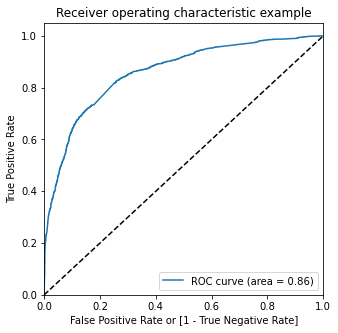

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [127]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.747052    2240          1    1    1    1    1    1    1   
1          0        0.778814     113          1    1    1    1    1    1    1   
2          1        0.830706    4132          1    1    1    1    1    1    1   
3          0        0.132698    5573          0    1    1    0    0    0    0   
4          0        0.051461    1109          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    1    1    0    0  
1    1    1    0    0  
2    1    1    1    0  
3    0    0    0    0  
4    0    0    0    0

In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.517563  0.981722  0.221358
0.2   0.2  0.683861  0.904549  0.543027
0.3   0.3  0.768987  0.836718  0.725765
0.4   0.4  0.797943  0.704712  0.857439
0.5   0.5  0.798576  0.647035  0.895283
0.6   0.6  0.785918  0.581641  0.916278
0.7   0.7  0.764873  0.482941  0.944790
0.8   0.8  0.737500  0.374898  0.968896
0.9   0.9  0.690348  0.214054  0.994298


In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.329 is the optimum point to take it as a cutoff probability.

In [130]:
# Let us make the final prediction using 0.32 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.747052    2240          1    1    1    1    1    1    1   
1          0        0.778814     113          1    1    1    1    1    1    1   
2          1        0.830706    4132          1    1    1    1    1    1    1   
3          0        0.132698    5573          0    1    1    0    0    0    0   
4          0        0.051461    1109          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    1    1    0    0                1  
1    1    1    0    0                1  
2    1    1    1    0                1  
3    0    0    0    0                0  
4    0    0    0    0                0

In [131]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Converted  Converted_Prob  LeadId  predicted  0.0  0.1  0.2  0.3  0.4  \
0           0        0.747052    2240          1    1    1    1    1    1   
1           0        0.778814     113          1    1    1    1    1    1   
2           1        0.830706    4132          1    1    1    1    1    1   
3           0        0.132698    5573          0    1    1    0    0    0   
4           0        0.051461    1109          0    1    0    0    0    0   
5           0        0.065369    2282          0    1    0    0    0    0   
6           1        0.958404    2976          1    1    1    1    1    1   
7           0        0.248018    8431          0    1    1    1    0    0   
8           1        0.870372    2770          1    1    1    1    1    1   
9           1        0.989292    5790          1    1    1    1    1    1   
10          1        0.901150    2943          1    1    1    1    1    1   
11          0        0.313849    1196          0    1    1    1    1    0   
12          1        0.329967    8874          0    1    1    1    1    0   
13          0        0.144153    1491          0    1    1    0    0    0   
14          0        0.329967    7676          0    1    1    1    1    0   
15          1        0.343561    8750          0    1    1    1    1    0   
16          1        0.870372    5049          1    1    1    1    1    1   
17          0        0.329967    5691          0    1    1    1    1    0   
18          1        0.204227    5773          0    1    1    1    0    0   
19          0        0.114328    3906          0    1    1    0    0    0   

    0.5  0.6  0.7  0.8  0.9  final_predicted  lead_score  
0     1    1    1    0    0                1          75  
1     1    1    1    0    0                1          78  
2     1    1    1    1    0                1          83  
3     0    0    0    0    0                0          13  
4     0    0    0    0    0                0           5  
5     0    0    0    0    0                0           7  
6     1    1    1    1    1                1          96  
7     0    0    0    0    0                0          25  
8     1    1    1    1    0                1          87  
9     1    1    1    1    1                1          99  
10    1    1    1    1    1                1          90  
11    0    0    0    0    0                0          31  
12    0    0    0    0    0                1          33  
13    0    0    0    0    0                0          14  
14    0    0    0    0    0                1          33  
15    0    0    0    0    0                1          34  
16    1    1    1    1    0                1          87  
17    0    0    0    0    0                1          33  
18    0    0    0    0    0                0          20  
19    0    0    0    0    0                0          11

In [132]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2025
0     437
Name: final_predicted, dtype: int64

In [179]:
# check the precentage of final_predicted conversions

2025/float(2025+437)

0.822502030869212

##### Hence we can see that the final prediction of conversions have a target of 82% (82.25%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value  on final prediction on train set

In [134]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7735759493670886

In [135]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2864,  994],
       [ 437, 2025]])

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.822502030869212

In [138]:
# Let us calculate specificity

TN / float(TN+FP)

0.7423535510627268

In [139]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.2576464489372732


In [140]:
# Positive predictive value 

print (TP / float(TP+FP))

0.6707519046041736


In [141]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8676158739775826


##### Metrics - Precision and Recall

In [142]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3454,  404],
       [ 869, 1593]])

In [143]:
from sklearn.metrics import precision_score, recall_score

In [144]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7976965448172258

In [145]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6470349309504468

### Precision and recall tradeoff

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

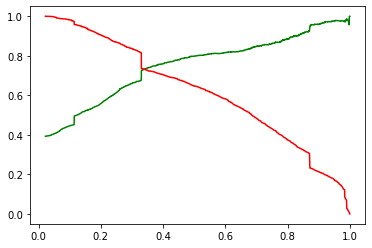

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [150]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [151]:
X_test = X_test[col]
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  Search  \
2296             0       0.1875                     0.665313       0   
8697             0       0.4375                     0.184032       0   
7378             0       0.1250                     0.163284       0   
8631             0       0.3125                     0.407307       0   
4799             0       0.5000                     0.744700       0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
2296                   1                       0                           0   
8697                   0                       0                           0   
7378                   0                       0                           0   
8631                   0                       0                           1   
4799                   0                       0                           1   

      Lead Source_Reference  Lead Source_Welingak Website  \
2296                      0                             0   
8697                      0                             0   
7378                      0                             0   
8631                      0                             0   
4799                      0                             0   

      What is your current occupation_Student  \
2296                                        0   
8697                                        0   
7378                                        0   
8631                                        0   
4799                                        0   

      What is your current occupation_Unemployed  \
2296                                           1   
8697                                           1   
7378                                           1   
8631                                           1   
4799                                           1   

      What is your current occupation_Working Professional  
2296                                                  0     
8697                                                  0     
7378                                                  0     
8631                                                  0     
4799                                                  0

In [152]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [153]:
y_test_pred = res.predict(X_test_sm)

In [154]:
y_test_pred[:10]

2296    0.803074
8697    0.291736
7378    0.215403
8631    0.555428
4799    0.867544
4503    0.114328
7129    0.932015
1717    0.114328
8398    0.901161
5116    0.329967
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
# Let's see the head

y_pred_1.head()

0
2296  0.803074
8697  0.291736
7378  0.215403
8631  0.555428
4799  0.867544

In [157]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [158]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [159]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

Converted  LeadId         0
0          1    2296  0.803074
1          0    8697  0.291736
2          0    7378  0.215403
3          0    8631  0.555428
4          1    4799  0.867544

In [162]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [164]:
y_pred_final.head()

Converted  LeadId  Converted_Prob
0          1    2296        0.803074
1          0    8697        0.291736
2          0    7378        0.215403
3          0    8631        0.555428
4          1    4799        0.867544

In [165]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.32%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.32 else 0)

In [166]:
y_pred_final.head()

Converted  LeadId  Converted_Prob  final_predicted
0          1    2296        0.803074                1
1          0    8697        0.291736                0
2          0    7378        0.215403                0
3          0    8631        0.555428                1
4          1    4799        0.867544                1

In [167]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

Converted  LeadId  Converted_Prob  final_predicted  lead_score
0           1    2296        0.803074                1          80
1           0    8697        0.291736                0          29
2           0    7378        0.215403                0          22
3           0    8631        0.555428                1          56
4           1    4799        0.867544                1          87
5           0    4503        0.114328                0          11
6           0    7129        0.932015                1          93
7           0    1717        0.114328                0          11
8           0    8398        0.901161                1          90
9           1    5116        0.329967                1          33
10          0    1838        0.258512                0          26
11          1    5057        0.742553                1          74
12          0    7015        0.040161                0           4
13          0    6352        0.401773                1          40
14          0     575        0.329967                1          33
15          1    4597        0.238804                0          24
16          0    8355        0.560195                1          56
17          1    8574        0.331482                1          33
18          0    4207        0.040161                0           4
19          1    4420        0.794440                1          79

In [168]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    831
0    184
Name: final_predicted, dtype: int64

In [178]:
# check the precentage of final_predicted conversions on test data

831/float(831+184)

0.81871921182266

##### Hence we can see that the final prediction of conversions have a target rate of 82% (81.8%)

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity  on test set

In [171]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7689184200812108

In [172]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1252,  442],
       [ 184,  831]])

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.81871921182266

In [175]:
# Let us calculate specificity
TN / float(TN+FP)

0.7390791027154664

##### Precision and Recall metrics for the test set 

In [176]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.6527886881382561
recall  0.81871921182266


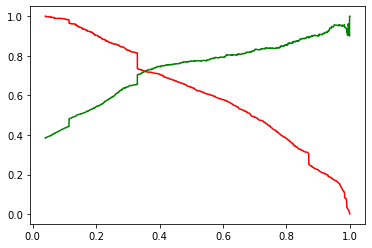

In [177]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Conclusion :
    
   
   - While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
   
   - Accuracy, Sensitivity and Specificity values of test set are around 77%, 82% and 74% which are approximately closer to the respective values calculated using trained set.
   - Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 82%
   - Hence overall this model seems to be good.   